## Задача

**Провести анализ показателей продаж в натуральном и стоимостном выражении, написать выводы по результатам анализа.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth

In [2]:
df = pd.read_excel('/datasets/table.xlsx')
display(df.head())
df.info()

,Агент,"Продажи в период n, шт. купонов","Продажи в период n+1, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов","Продажи в период n+1, руб., со сборами","Продажи в период n+1, руб., без сборов"
0,ааа,0,1,NaN,NaN,6391.00,3841.95
1,ааа,1,0,6780.33,3670.84,NaN,NaN
2,ббб,2,0,9900.30,4708.12,NaN,NaN
3,ввв,0,1,NaN,NaN,9238.23,6703.07
4,ввв,1,0,1633.74,1238.95,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Агент                                    567 non-null    object 
 1   Продажи  в период n, шт. купонов         567 non-null    int64  
 2   Продажи в период n+1, шт. купонов        567 non-null    int64  
 3   Продажи в период n, руб., со сборами     344 non-null    float64
 4   Продажи в период n, руб., без сборов     344 non-null    float64
 5   Продажи в период n+1, руб., со сборами   352 non-null    float64
 6   Продажи  в период n+1, руб., без сборов  352 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 31.1+ KB


Есть пропущенные значения в столбцах Продажи в период n, руб., со сборами, Продажи в период n, руб., без сборов, Продажи в период n+1, руб., со сборами, Продажи  в период n+1, руб., без сборов. Пропусками обозначено оотсутствие купонов для какого-либо агента и, соответственно, отсутствие продаж.

Сгруппируем датафрейм по столбцу `Агент` и посчитаем суммарные продажи по каждому столбцу:

In [3]:
df = df.groupby('Агент').sum().reset_index()
df

,Агент,"Продажи в период n, шт. купонов","Продажи в период n+1, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов","Продажи в период n+1, руб., со сборами","Продажи в период n+1, руб., без сборов"
0,ПроТ,1,0,7090.00,4500.00,0.00,0.00
1,ТКС,0,569,0.00,0.00,3495081.13,2059450.14
2,ааа,1,1,6780.33,3670.84,6391.00,3841.95
3,авв,11,6,42635.00,14545.00,33469.00,22345.00
4,авдл,0,1,0.00,0.00,5724.00,3060.00
...,...,...,...,...,...,...,...
272,яддж,9,4,353967.00,230525.00,36986.00,26330.00
273,яимс,25,8,110052.21,51660.26,64202.00,37930.00
274,якка,9,0,35647.00,14575.00,0.00,0.00
275,ячсв,0,1,0.00,0.00,4532.76,3861.36


Всего получилось 277 уникальных агентов.

Построим графики распределения продаж со сборами и без:

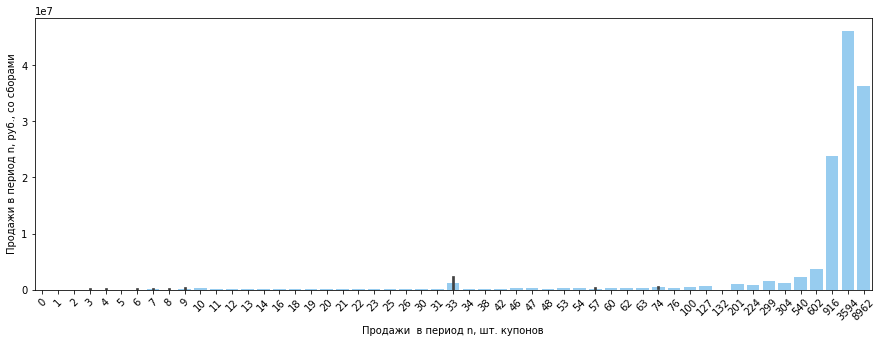

In [4]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Продажи  в период n, шт. купонов'], y=df['Продажи в период n, руб., со сборами'], color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

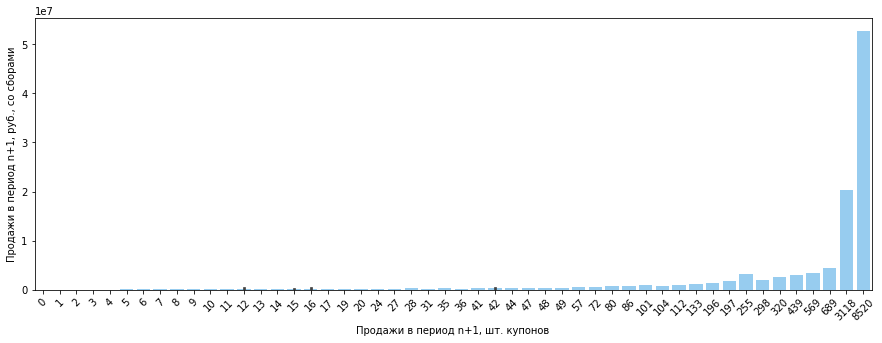

In [5]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Продажи в период n+1, шт. купонов'], y=df['Продажи в период n+1, руб., со сборами'], color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

По графикам видно, что есть огромные хвосты с небольшим количеством купонов и отдельные пиковые значения с максимальными продажами в районе 50 млн.

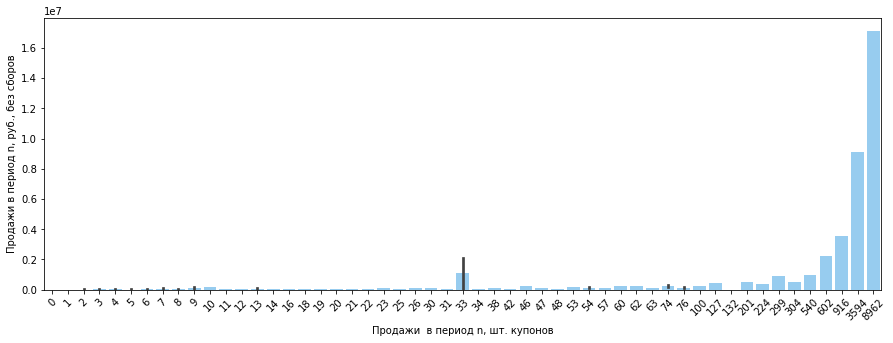

In [6]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Продажи  в период n, шт. купонов'], y=df['Продажи в период n, руб., без сборов'], color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

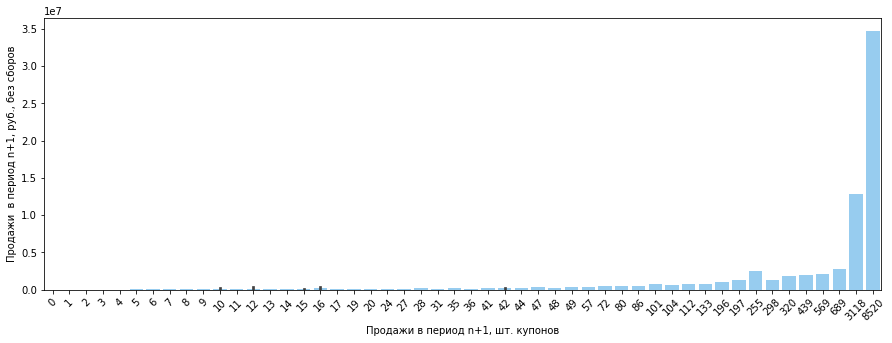

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Продажи в период n+1, шт. купонов'], y=df['Продажи  в период n+1, руб., без сборов'], color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

По графикам видно, что на n+1 период число продаж купонов стало увеличиваться более равномерно, продажи без сбора увеличились почти в 2 раза.

Составим 2 новых датафрейма: один на период n, второй на период n+1:

In [8]:
df_1 = df[['Агент', 'Продажи  в период n, шт. купонов', 'Продажи в период n, руб., со сборами', 'Продажи в период n, руб., без сборов']]
df_1

,Агент,"Продажи в период n, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов"
0,ПроТ,1,7090.00,4500.00
1,ТКС,0,0.00,0.00
2,ааа,1,6780.33,3670.84
3,авв,11,42635.00,14545.00
4,авдл,0,0.00,0.00
...,...,...,...,...
272,яддж,9,353967.00,230525.00
273,яимс,25,110052.21,51660.26
274,якка,9,35647.00,14575.00
275,ячсв,0,0.00,0.00


In [9]:
df_1.describe()

,"Продажи в период n, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов"
count,277.000000,2.770000e+02,2.770000e+02
mean,64.765343,4.729587e+05,1.596582e+05
std,583.451629,3.802434e+06,1.196121e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,2.000000,7.590000e+03,3.830000e+03
75%,7.000000,3.726500e+04,2.179000e+04
max,8962.000000,4.612724e+07,1.713402e+07


In [10]:
df_2 = df[['Агент', 'Продажи в период n+1, шт. купонов', 'Продажи в период n+1, руб., со сборами', 'Продажи  в период n+1, руб., без сборов']]
df_2

,Агент,"Продажи в период n+1, шт. купонов","Продажи в период n+1, руб., со сборами","Продажи в период n+1, руб., без сборов"
0,ПроТ,0,0.00,0.00
1,ТКС,569,3495081.13,2059450.14
2,ааа,1,6391.00,3841.95
3,авв,6,33469.00,22345.00
4,авдл,1,5724.00,3060.00
...,...,...,...,...
272,яддж,4,36986.00,26330.00
273,яимс,8,64202.00,37930.00
274,якка,0,0.00,0.00
275,ячсв,1,4532.76,3861.36


In [11]:
df_2.describe()

,"Продажи в период n+1, шт. купонов","Продажи в период n+1, руб., со сборами","Продажи в период n+1, руб., без сборов"
count,277.000000,2.770000e+02,2.770000e+02
mean,60.155235,4.064273e+05,2.712999e+05
std,547.521439,3.415497e+06,2.240030e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,2.000000,1.191300e+04,8.334760e+03
75%,6.000000,5.909300e+04,3.975450e+04
max,8520.000000,5.274733e+07,3.473088e+07


Среднее значение купонов уменьшилось почти с 65 до 60 на n+1 период, при этом медиана не изменилась. Среднее значение продаж со сборами также уменьшилось с 4.729587e+05 до 4.064273e+05, зато для продаж без сборов средние и медианы выросли на n+1 период.

Посмотрим на первый датафрейм df_1 - продажи в период n:

In [12]:
df_1

,Агент,"Продажи в период n, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов"
0,ПроТ,1,7090.00,4500.00
1,ТКС,0,0.00,0.00
2,ааа,1,6780.33,3670.84
3,авв,11,42635.00,14545.00
4,авдл,0,0.00,0.00
...,...,...,...,...
272,яддж,9,353967.00,230525.00
273,яимс,25,110052.21,51660.26
274,якка,9,35647.00,14575.00
275,ячсв,0,0.00,0.00


Отсортируем таблицу по убыванию продаж купонов в период n:

In [13]:
df_1.sort_values(by='Продажи  в период n, шт. купонов', ascending=False)

,Агент,"Продажи в период n, шт. купонов","Продажи в период n, руб., со сборами","Продажи в период n, руб., без сборов"
173,рццо,8962,36355063.23,17134020.97
197,сук,3594,46127237.41,9096965.23
239,цеены,916,23891357.91,3568687.06
98,кпк,602,3649815.54,2201325.65
129,нтт,540,2269867.01,963876.90
...,...,...,...,...
115,мбав,0,0.00,0.00
114,мага,0,0.00,0.00
110,лорв,0,0.00,0.00
108,лето,0,0.00,0.00


Видим, что наибольшее число продаж пришлось на агента рццо - 8962 шт., на 2 месте агент сук - 3594 шт. Также наблюдается несколько агентов вообще без продаж.

In [14]:
df_1 = df_1.rename(columns={'Продажи  в период n, шт. купонов': 'coupons'})
df_1 = df_1.sort_values(by='coupons', ascending=False)
df_1.query('coupons == 0')['Агент'].count()

91

Получили 91 агента с нулевыми продажами в период n.

Посмотрим на второй датафрейм df_2 - продажи в период n+1 и отсортируем его по убыванию продаж купонов в период n+1:

In [15]:
df_2.sort_values(by='Продажи в период n+1, шт. купонов', ascending=False)

,Агент,"Продажи в период n+1, шт. купонов","Продажи в период n+1, руб., со сборами","Продажи в период n+1, руб., без сборов"
173,рццо,8520,52747333.27,34730882.14
197,сук,3118,20228113.51,12873552.16
40,выыц,689,4454210.25,2719383.24
1,ТКС,569,3495081.13,2059450.14
239,цеены,439,2982338.48,1915426.90
...,...,...,...,...
212,торд,0,0.00,0.00
211,тома,0,0.00,0.00
55,длои,0,0.00,0.00
209,тне,0,0.00,0.00


Для этого датафрейма наибольшее число продаж также пришлось на агента рццо - 8520 купонов, на 2 месте тоже остался сук - 3118 шт. Далее агенты отличаются. Здесь также много агентов без продаж.

Посмотрим, сколько у нас всего агентов с нулевыми продажами:

In [16]:
df_2 = df_2.rename(columns={'Продажи в период n+1, шт. купонов': 'coupons'})
df_2 = df_2.sort_values(by='coupons', ascending=False)
df_2.query('coupons == 0')['Агент'].count()

85

Получили 85 агентов с нулевыми продажами в период n+1.

Составим новый датафрейм с суммарными продажами на оба периода (n и n+1):

In [17]:
df_total = pd.DataFrame({'Период':['n', 'n+1'], 
                         'Количество проданных купонов':[df_1['coupons'].sum(), df_2['coupons'].sum()],
                         'Продажи со сборами': [df_1['Продажи в период n, руб., со сборами'].sum(), df_2['Продажи в период n+1, руб., со сборами'].sum()],
                         'Продажи без сборов': [df_1['Продажи в период n, руб., без сборов'].sum(), df_2['Продажи  в период n+1, руб., без сборов'].sum()]
                        })
df_total

,Период,Количество проданных купонов,Продажи со сборами,Продажи без сборов
0,n,17940,1.310096e+08,44225320.34
1,n+1,16663,1.125803e+08,75150076.76


Количество проданных купонов снизилось на n+1 период на 1277 штук. Продажи со сборами также уменьшились, при этом продажи без сборов сильно выросли (почти на 31 млн руб).

Добавим столбцы с расчетом количества продаж на 1 купон:

In [18]:
df_total['Продажи со сборами за 1 купон'] = df_total['Продажи со сборами'] / df_total['Количество проданных купонов']
df_total['Продажи без сборов за 1 купон'] = df_total['Продажи без сборов'] / df_total['Количество проданных купонов']
df_total

,Период,Количество проданных купонов,Продажи со сборами,Продажи без сборов,Продажи со сборами за 1 купон,Продажи без сборов за 1 купон
0,n,17940,1.310096e+08,44225320.34,7302.651814,2465.179506
1,n+1,16663,1.125803e+08,75150076.76,6756.307355,4509.996805


Стоимость 1 купона уменьшилась для продаж со сборами и увеличилась почти в 2 раза для продаж без сборов

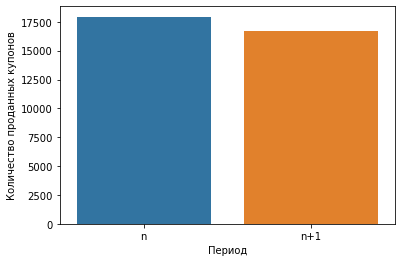

In [19]:
sns.barplot(data=df_total, x='Период', y='Количество проданных купонов')
plt.show()

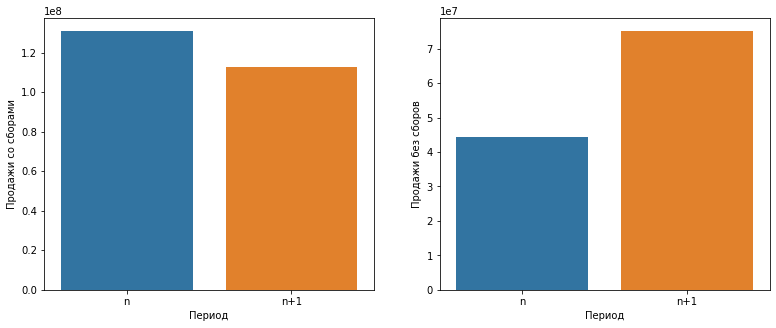

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.barplot(data=df_total, x='Период', y='Продажи со сборами', ax=ax[0])
sns.barplot(data=df_total, x='Период', y='Продажи без сборов', ax=ax[1])
plt.show()

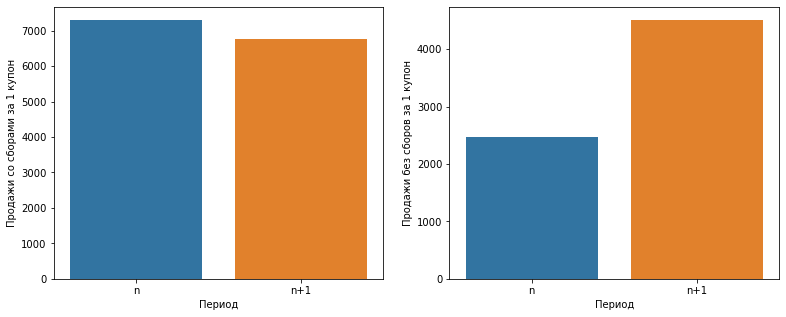

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.barplot(data=df_total, x='Период', y='Продажи со сборами за 1 купон', ax=ax[0])
sns.barplot(data=df_total, x='Период', y='Продажи без сборов за 1 купон', ax=ax[1])
plt.show()

**Выводы:**

1) Всего 277 уникальных агентов.  
2) В период n наибольшее число продаж пришлось на агента рццо - 8962 шт., на 2 месте агент сук - 3594 шт.  
3) В период n+1 наибольшее число продаж также пришлось на агента рццо - 8520 купонов, на 2 месте тоже остался сук - 3118 шт.  
4) Для обоих периодов наблюдается большое количество агентов без продаж (для периода n - 91, для периода n+1 - 85).  
5) Количество проданных купонов снизилось на n+1 период на 1277 штук.  
6) Продажи со сборами уменьшились на n+1 период, при этом продажи без сборов сильно выросли (почти на 31 млн руб).  
7) Стоимость 1 купона уменьшилась для продаж со сборами и увеличилась почти в 2 раза для продаж без сборов на n+1 период.

Количество проданных купонов уменьшилось, поэтому уменьшились продажи со сборами, значит, сборы зависят от числа проданных купонов.   
Количество проданных купонов уменьшилось, а продажи без сборов сильно выросли. Возможно, это произошло засчет сокращения агентов с нулевыми продажами. Также могла просто вырасти цена за купон так, что пользователи отказывались от сборов, потому что билет уже стал стоить столько, сколько в периоде n стоил со сборами или больше.